#**XG BOOST Regression**

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#**Training**

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load your dataset, specifying the encoding
dataset = pd.read_csv('Dhaka_wind_daily.csv', encoding='latin-1') # or 'cp1252', or any other potentially relevant encodings.
X = dataset.iloc[:, [0,1,2]].values
y = dataset.iloc[:,[3,4,5,6,7,8,9,10,11,12]].values

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.3 MB/s eta 0:00:00


In [13]:
from catboost import CatBoostRegressor

regressor = CatBoostRegressor(loss_function='MultiRMSE', verbose=0)
regressor.fit(X_train, y_train)

In [15]:
y_pred = regressor.predict(X_test)


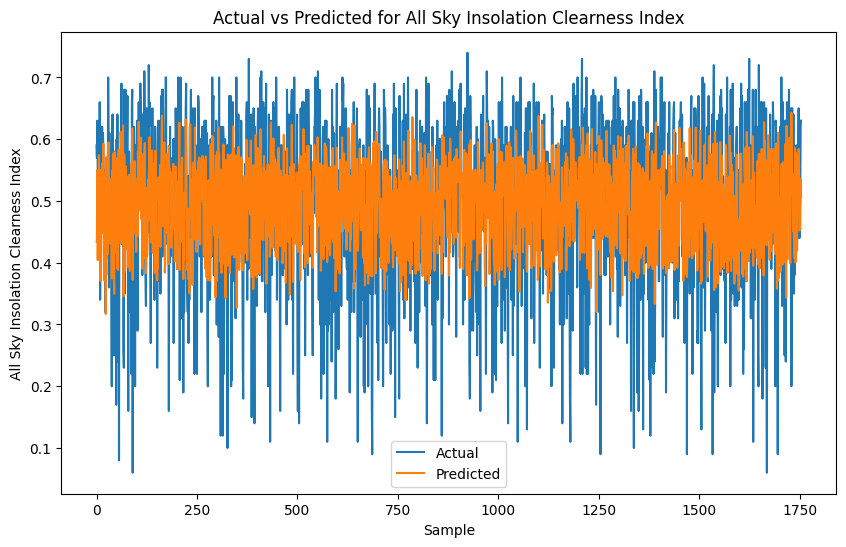

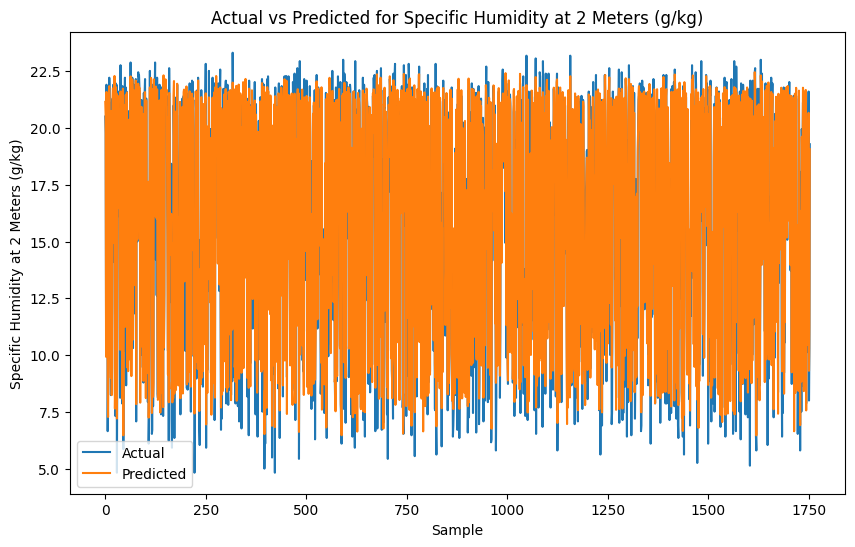

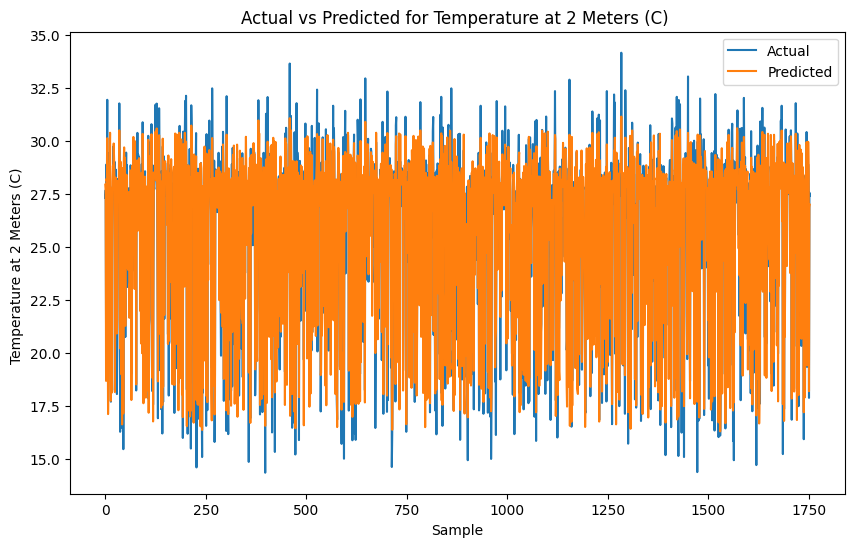

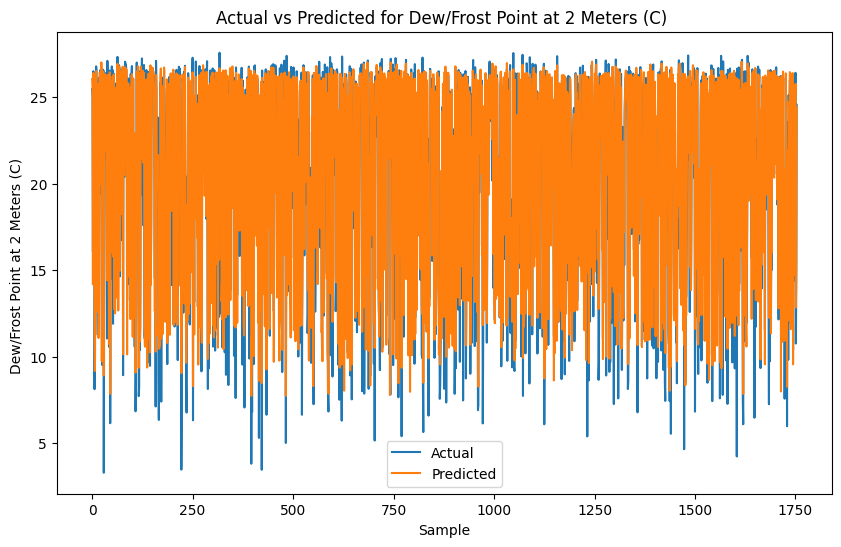

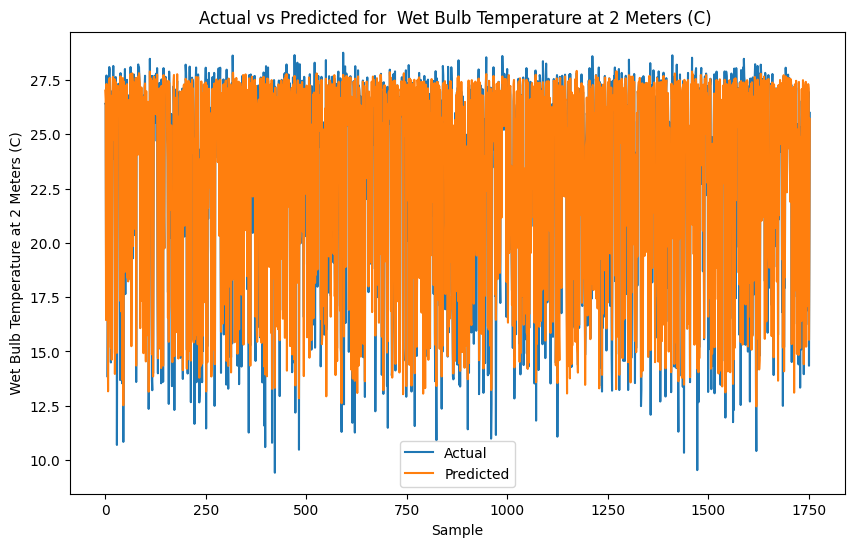

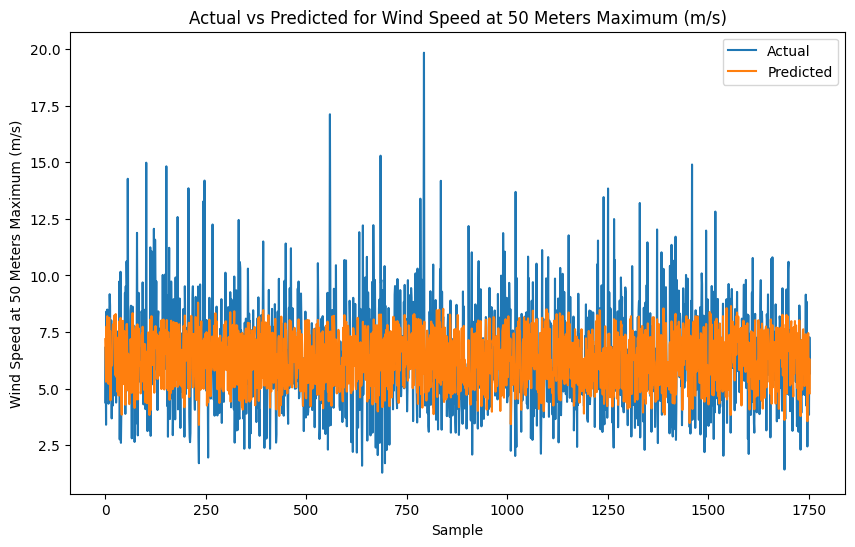

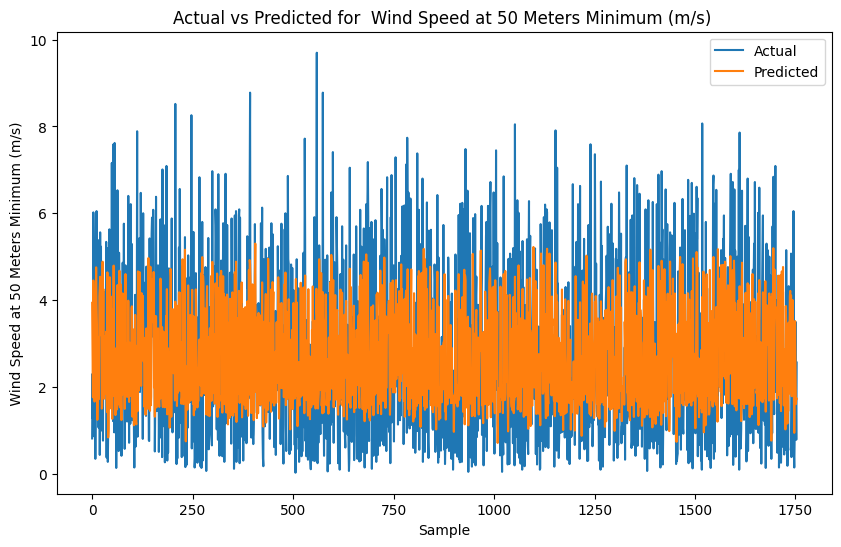

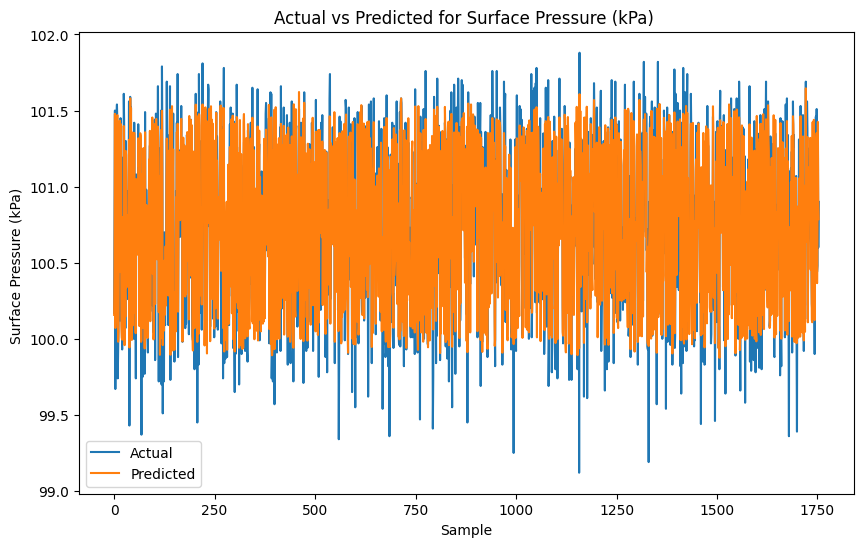

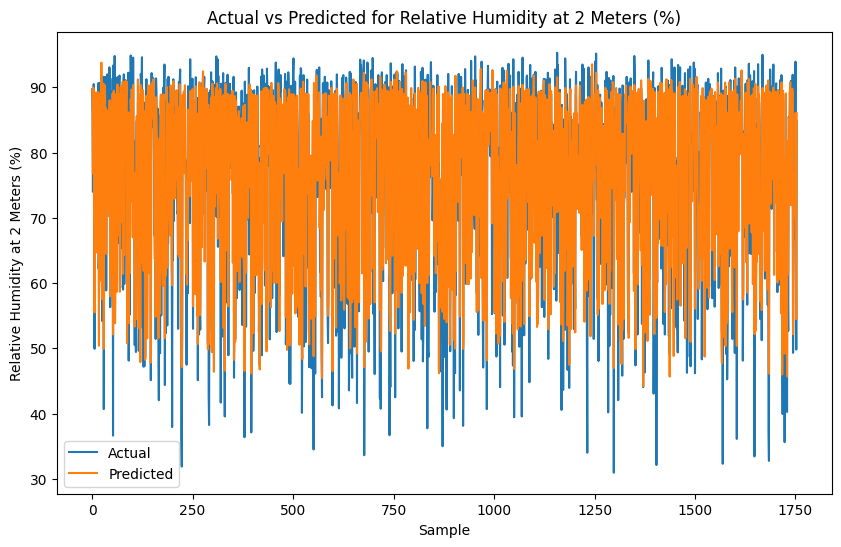

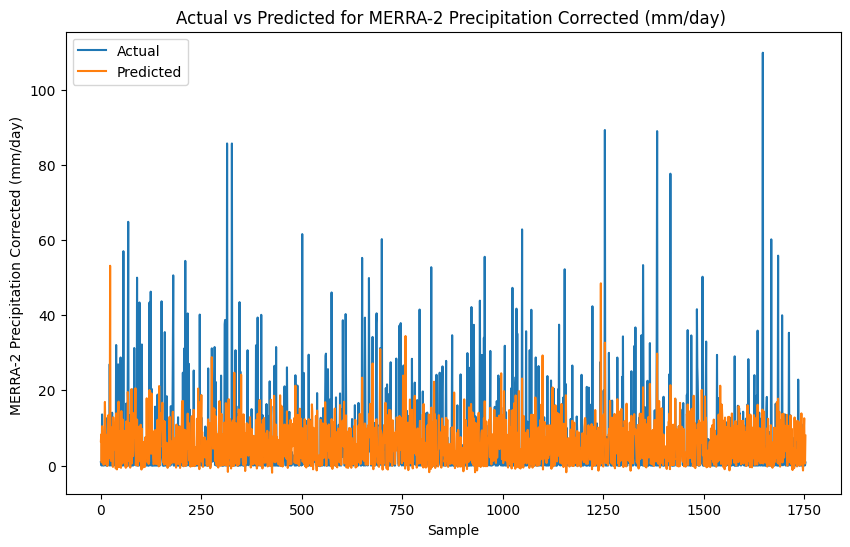

Error Metrics for All Sky Insolation Clearness Index:
Mean Absolute Error (MAE): 0.08651337996928984
Mean Squared Error (MSE): 0.0125151344391962
Root Mean Squared Error (RMSE): 0.11187106167010394
R-squared (R2): 0.2855997589230975
--------------------
Error Metrics for Specific Humidity at 2 Meters (g/kg):
Mean Absolute Error (MAE): 0.9672930467807886
Mean Squared Error (MSE): 1.755557009856188
Root Mean Squared Error (RMSE): 1.3249743430935514
R-squared (R2): 0.9394361112848638
--------------------
Error Metrics for Temperature at 2 Meters (C) :
Mean Absolute Error (MAE): 0.9129732626260595
Mean Squared Error (MSE): 1.4282593608101115
Root Mean Squared Error (RMSE): 1.1950980548934516
R-squared (R2): 0.9217676340262788
--------------------
Error Metrics for Dew/Frost Point at 2 Meters (C) :
Mean Absolute Error (MAE): 1.2308544158644847
Mean Squared Error (MSE): 3.3921137736176687
Root Mean Squared Error (RMSE): 1.841769196619834
R-squared (R2): 0.9123174115240502
-------------------

In [17]:

import matplotlib.pyplot as plt

# Assuming y_pred and y_test have the same shape (number of samples, 9 features)
for i in range(10):
  plt.figure(figsize=(10, 6))
  plt.plot(y_test[:, i], label='Actual')
  plt.plot(y_pred[:, i], label='Predicted')
  plt.xlabel('Sample')
  plt.ylabel(dataset.columns[i+3]) # Assuming features start from the 4th column
  plt.title(f'Actual vs Predicted for {dataset.columns[i+3]}')
  plt.legend()
  plt.show()


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

for i in range(8):
  mae = mean_absolute_error(y_test[:,i], y_pred[:,i])
  mse = mean_squared_error(y_test[:,i], y_pred[:,i])
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test[:,i], y_pred[:,i])

  print(f"Error Metrics for {dataset.columns[i+3]}:")
  print(f"Mean Absolute Error (MAE): {mae}")
  print(f"Mean Squared Error (MSE): {mse}")
  print(f"Root Mean Squared Error (RMSE): {rmse}")
  print(f"R-squared (R2): {r2}")
  print("-" * 20)

In [18]:
Year = int(input("Enter the year: "))
Month = int(input("Enter the month: "))
Day = int(input("Enter the day: "))
# Convert the input data to a NumPy array
input_data = np.array([[Year, Month, Day]])
y_pred = regressor.predict(input_data)
print(y_pred)
# Assuming y_pred is the prediction from your model
y_pred1 = regressor.predict(input_data)

# Get column names from the original dataset
column_names = dataset.columns[3:11].tolist()

# Create a dictionary to store the predicted values with their corresponding names
results = dict(zip(column_names, y_pred1[0]))

# Print the results
for name, value in results.items():
    print(f"{name}: {value}")

Enter the year: 2025
Enter the month: 1
Enter the day: 1
[[  0.43031092   9.54741508  17.05328271  13.43172217  15.24456951
    5.27464847   2.09345978 101.62195678  79.70449938   2.78990816]]
All Sky Insolation Clearness Index: 0.4303109196540541
Specific Humidity at 2 Meters (g/kg): 9.547415078702691
Temperature at 2 Meters (C) : 17.053282705250737
Dew/Frost Point at 2 Meters (C) : 13.431722172151758
 Wet Bulb Temperature at 2 Meters (C) : 15.244569509280979
Wind Speed at 50 Meters Maximum (m/s): 5.274648470039224
 Wind Speed at 50 Meters Minimum (m/s) : 2.093459780872813
Surface Pressure (kPa) : 101.62195678242112


In [20]:
X_10years = pd.read_csv('Year_2025_to_2035_Month_Day.csv')
X_10years = X_10years.iloc[:, [0,1,2]].values
y_10years_predicted = regressor.predict(X_10years)


In [21]:
import pandas as pd
from google.colab import files

# Original column names for 10 years dataset
original_columns = [
    'YEAR', 'MONTH', 'DAY', 'All Sky Insolation Clearness Index',
    'Specific Humidity at 2 Meters (g/kg)', 'Temperature at 2 Meters (C)',
    'Dew/Frost Point at 2 Meters (C)', 'Wet Bulb Temperature at 2 Meters (C)',
    'Wind Speed at 50 Meters Maximum (m/s)', 'Wind Speed at 50 Meters Minimum (m/s)',
    'Surface Pressure (kPa)', 'Relative Humidity at 2 Meters (%)',
    'MERRA-2 Precipitation Corrected (mm/day)'
]

# Create DataFrames for the input data (for 10 years) and predicted values
df_X_10years = pd.DataFrame(X_10years, columns=original_columns[:3])  # YEAR, MONTH, DAY
df_predicted = pd.DataFrame(
    y_10years_predicted, columns=original_columns[3:]  # Match predicted columns to dataset
)

# Concatenate the DataFrames horizontally (input + predictions)
combined_df = pd.concat([df_X_10years, df_predicted], axis=1)

# Assign the original column names to the combined DataFrame
combined_df.columns = original_columns

# Save the combined DataFrame to a CSV file
combined_df.to_csv('combined_predictions.csv', index=False)

# Trigger the file download
files.download('combined_predictions.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
X_2022year = pd.read_csv('Year_2022_Month_Day.csv')
X_2022year = X_2022year.iloc[:, [0,1,2]].values
y_2022year_predicted = regressor.predict(X_2022year)

In [23]:
import pandas as pd
from google.colab import files

# Load the updated column names (with the new column added)
original_columns = [
    'YEAR', 'MONTH', 'DAY', 'All Sky Insolation Clearness Index',
    'Specific Humidity at 2 Meters (g/kg)', 'Temperature at 2 Meters (C)',
    'Dew/Frost Point at 2 Meters (C)', 'Wet Bulb Temperature at 2 Meters (C)',
    'Wind Speed at 50 Meters Maximum (m/s)', 'Wind Speed at 50 Meters Minimum (m/s)',
    'Surface Pressure (kPa)', 'Relative Humidity at 2 Meters (%)',
    'MERRA-2 Precipitation Corrected (mm/day)'
]

# Create DataFrame for the predicted values for 2022
df_predicted_2022 = pd.DataFrame(
    y_2022year_predicted, columns=original_columns[3:]  # Match predicted columns to dataset
)

# Create DataFrame for the input data (2022)
df_X_2022year = pd.DataFrame(X_2022year, columns=original_columns[:3])  # YEAR, MONTH, DAY

# Concatenate the DataFrames horizontally
combined_df_2022 = pd.concat([df_X_2022year, df_predicted_2022], axis=1)

# Assign the original column names to the combined DataFrame
combined_df_2022.columns = original_columns

# Save the combined DataFrame to a CSV file
combined_df_2022.to_csv('combined_predictions_2022.csv', index=False)

# Download the file
files.download('combined_predictions_2022.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

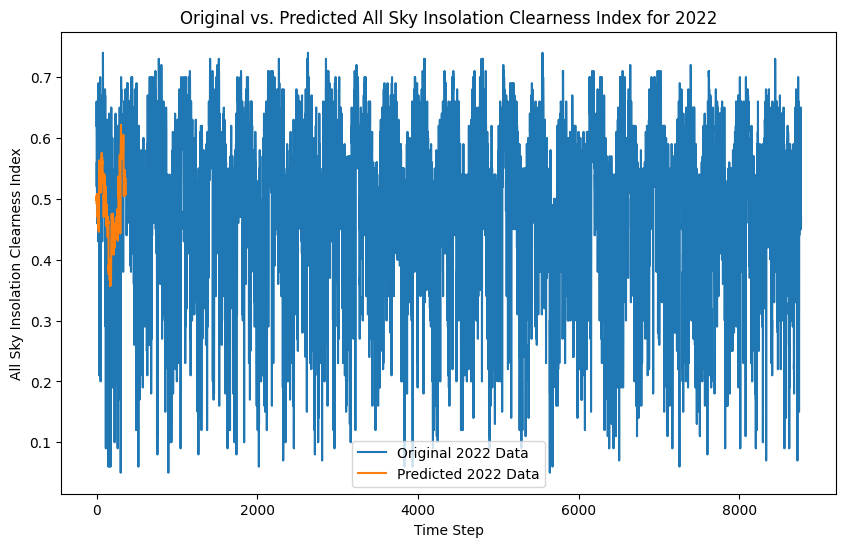

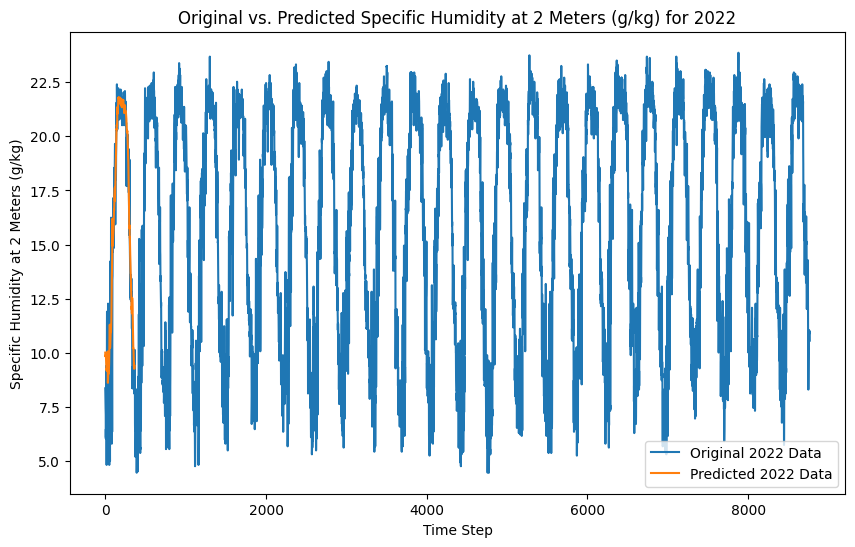

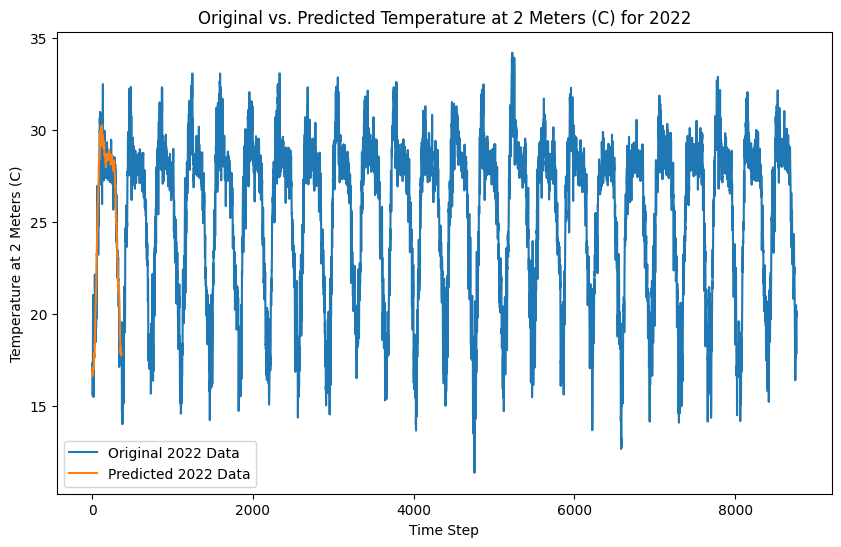

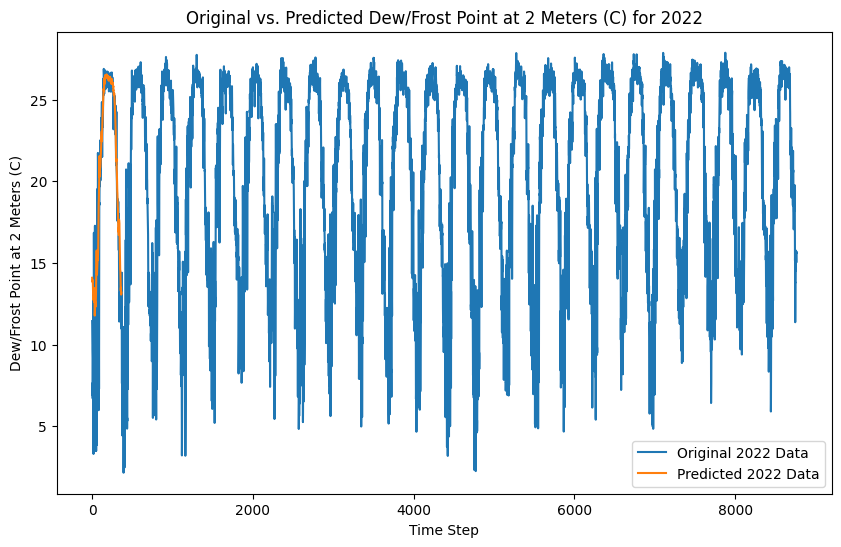

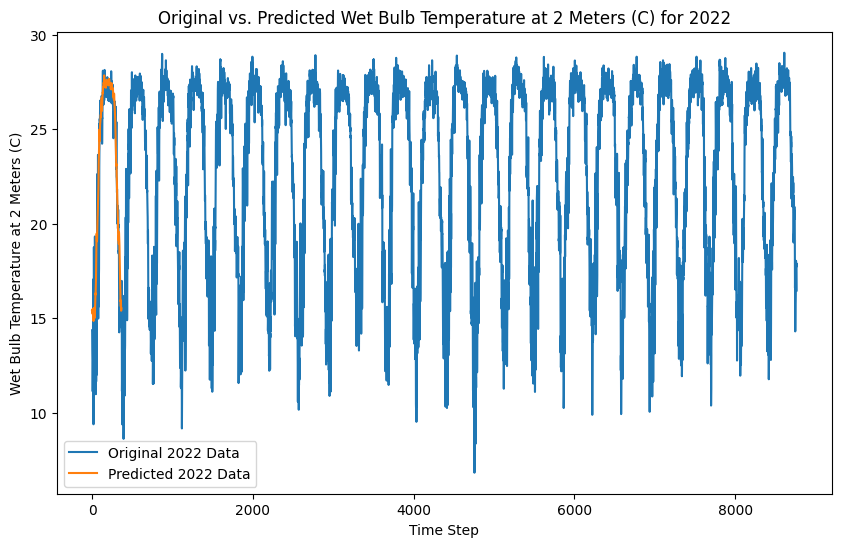

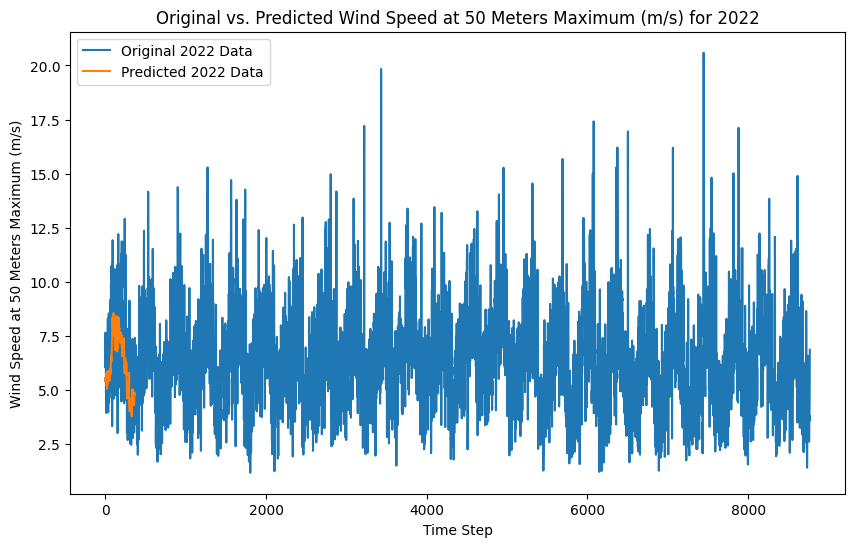

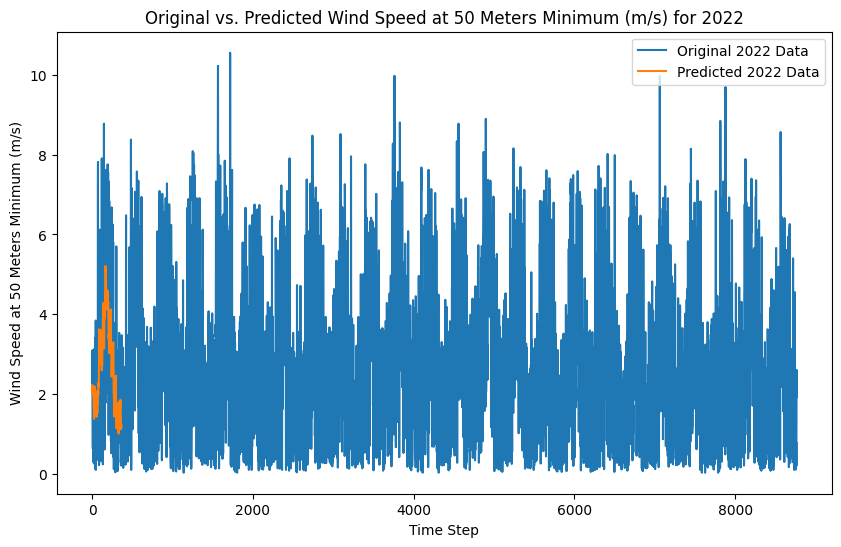

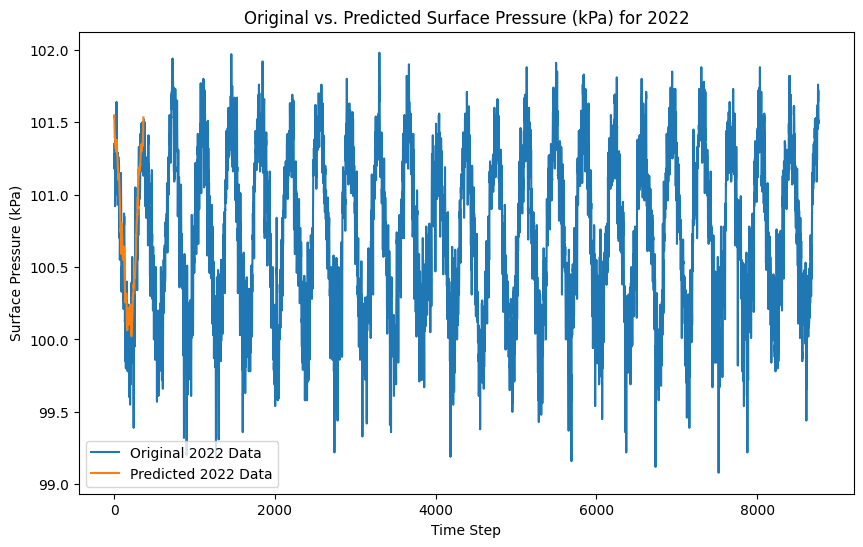

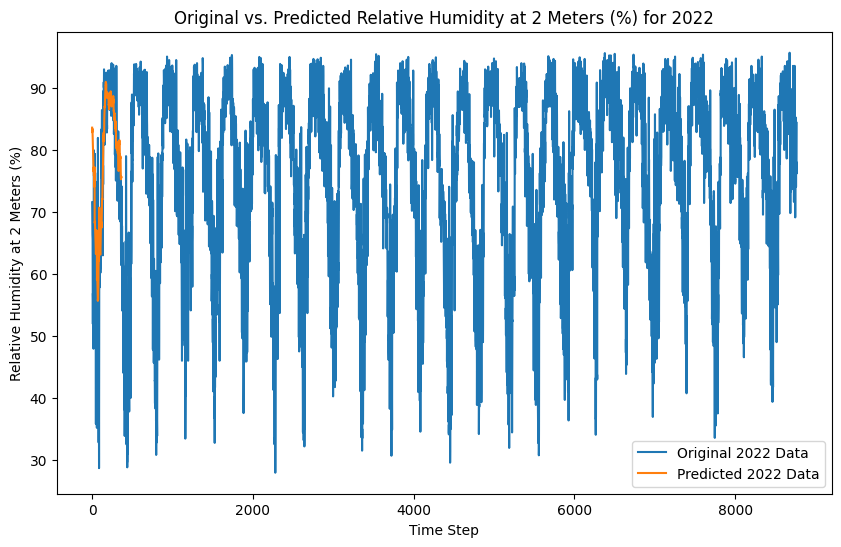

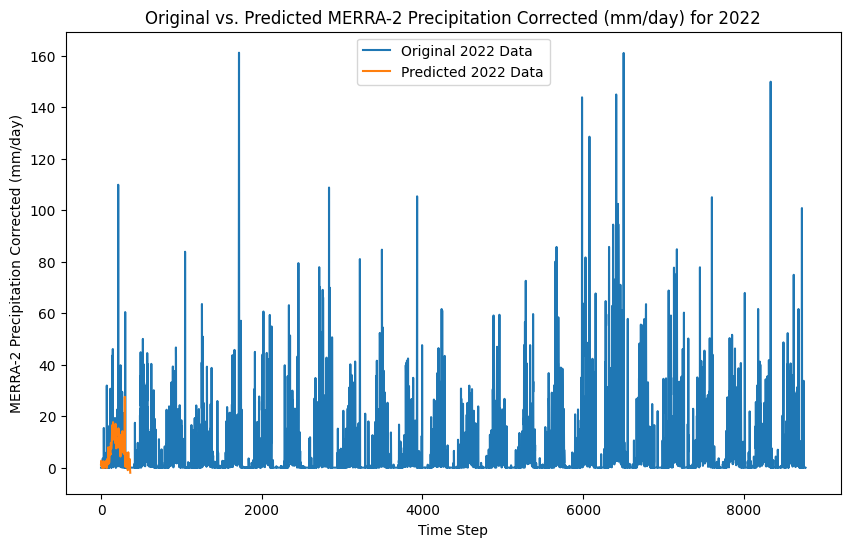

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

original_2022_data = pd.read_csv('Dhaka_wind_daily.csv')
predicted_2022_data = pd.read_csv('combined_predictions_2022.csv')

# Strip any leading/trailing spaces from column names in both DataFrames
original_2022_data.columns = original_2022_data.columns.str.strip()
predicted_2022_data.columns = predicted_2022_data.columns.str.strip()

for column in original_2022_data.columns[3:]:  # Assuming data starts from the 4th column
    plt.figure(figsize=(10, 6))
    plt.plot(original_2022_data[column], label='Original 2022 Data')
    plt.plot(predicted_2022_data[column], label='Predicted 2022 Data')
    plt.xlabel('Time Step')
    plt.ylabel(column)
    plt.title(f'Original vs. Predicted {column} for 2022')
    plt.legend()
    plt.show()